<h1 align=center><font size = 5>Peer-graded Assignment: Build a Regression Model in Keras</font></h1>

<a id="title_introduction"></a>
# Introduction
This notebook covers the peer-graded assignment: "Build a Regression Model in Keras" which concludes the course "Introduction to Deep Learning & Neural Networks with Keras". 

<a id="title_objectives"></a>
# Objectives
## A. Build a baseline model
Use the Keras library to build a neural network with the following:
- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error  as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.
2. Train the model on the training data using 50 epochs.
3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.
4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.
5. Report the mean and the standard deviation of the mean squared errors.

## B. Normalize the data
Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

How does the mean of the mean squared errors compare to that from Step A?

## C. Increase the number of epochs
Repeat Part B but use 100 epochs this time for training.
How does the mean of the mean squared errors compare to that from Step B?

## D. Increase the number of hidden layers
Repeat part B but use a neural network with the following instead:
- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

<a id="title_toc"></a>
# Table of contents

- [Introduction](#title_introduction)
- [Objectives](#title_objectives)
- [Table of contents](#title_toc)
- [Concrete compressive strength regression model](#main_title)
    - [Init](#title_init)
    - [Load and prepare data](#title_load)    
    - [A Build a baseline model](#title_a)
    - [B Normalize the data](#title_b)
    - [C Increase the number of epochs](#title_c)
    - [D Increase the number of hidden layers](#title_d)
 

# Concrete compressive strength regression model
<a id="main_title"></a>

<a id="title_init"></a>
## Init

In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [31]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="title_load"></a>
## Load and prepare data

### Get dataset

In [3]:
# Get Data
concrete_data = pd.read_csv('https://cocl.us/concrete_data')

### Data structure

In [4]:
# Data preview
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Datapoints
concrete_data.shape

(1030, 9)

The concrete dataset consists of 1030 rows with 9 columns.

Predictors
- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate
- Age

Target
- Strength

### Check and cleanup

#### Data Statistics

In [6]:
# Data statistics
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Check for null values

In [7]:
# null values
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

Data looks clean so far. The only thing we need to consider is not to overfit the model due to the low number of samples.

### Predictors and target split
The target in this model is the strength. All other columns are predictors.

In [33]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # predictors
target = concrete_data['Strength'] # target

### Sanity check

In [9]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Preserve the number of predictor columns to n_cols for use as size of the input shape in the neural network layer

In [11]:
n_cols = predictors.shape[1] # number of predictor columns

<a id="title_a"></a>
## A. Build a baseline model
Using the Keras library to build a neural network with the following:
- One hidden layer of 10 nodes, and a ReLU activation function
- Use the adam optimizer and the mean squared error as the loss function.

In [12]:
# define regression model with 1 hidden layer
def regression_model_shallow():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,))) # One hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error') # adam optimizer and the mean squared error  as the loss function
    return model

### Train and test the model
- Randomly split the data into a training and test sets by holding 30% of the data for testing using the __[train_test_split helper function from Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)__.
- Train the model on the training data using 50 epochs.

#### Build and train the model

##### Build model

In [32]:
# build the model
model_shallow = regression_model_shallow()

##### Train/test split

In [14]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.3, random_state=42
)

##### Fit/train model

In [ ]:
# fit the model
# verbose is set to 0 for clarity, increase if needed
model_shallow.fit(X_train, y_train, epochs=50, verbose=0) # train with training dataset and 50 epochs
print("Training of model complete")

##### Evaluate model

In [16]:
mse = mean_squared_error(y_test, model_shallow.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 182.8756


##### Repeat train and evaluation 50 times

In [17]:
# Train and evaluate 50 times and calculate mean and standard deviation of the mean squared errors

# mean squared errors
mses_50 = np.array([])

# build the model
model_50 = regression_model_shallow()

for i in range(50):
    # train/test split
    X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(
        predictors, target, test_size=0.3, random_state=42
    )
    
    # fit the model
    # verbose is set to 0 for clarity, increase if needed
    model_50.fit(X_train_50, y_train_50, epochs=50, verbose=0) # train with training dataset and 50 epochs
    # evaluate the model
    mse_50 = mean_squared_error(y_test_50, model_50.predict(X_test_50))
    mses_50 = np.append(mses_50, mse_50, axis=None)
    print("Iteration " + str(i) + " of 50 training and evaluation of model complete. MSE is : {:.4f}".format(mse_50))  

model_50_mse_mean = np.mean(mses_50, axis=0)
model_50_mse_std = np.std(mses_50, axis=0)

print("\n")
print("The mean deviation of the mean squared error (MSE) on regular test set: {:.4f}".format(model_50_mse_mean))
print("The standard deviation of the mean squared error (MSE) on regular test set: {:.4f}".format(model_50_mse_std))

Iteration 0 of 50 training and evaluation of model complete. MSE is : 133.1366
Iteration 1 of 50 training and evaluation of model complete. MSE is : 123.8709
Iteration 2 of 50 training and evaluation of model complete. MSE is : 112.5076
Iteration 3 of 50 training and evaluation of model complete. MSE is : 112.2011
Iteration 4 of 50 training and evaluation of model complete. MSE is : 108.9166
Iteration 5 of 50 training and evaluation of model complete. MSE is : 109.9557
Iteration 6 of 50 training and evaluation of model complete. MSE is : 108.2936
Iteration 7 of 50 training and evaluation of model complete. MSE is : 110.1887
Iteration 8 of 50 training and evaluation of model complete. MSE is : 111.7784
Iteration 9 of 50 training and evaluation of model complete. MSE is : 131.4128
Iteration 10 of 50 training and evaluation of model complete. MSE is : 109.3430
Iteration 11 of 50 training and evaluation of model complete. MSE is : 117.8111
Iteration 12 of 50 training and evaluation of mode

<a id="title_b"></a>
## B. Normalize the data
Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.

In [18]:
# Normalize the data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


### Train and evaluation 50 times with normalized data

In [19]:
# Train and evaluate 50 times and calculate mean and standard deviation of the mean squared errors

# mean squared errors
mses_50_norm = np.array([])

# build the model
model_50_norm = regression_model_shallow()

for i in range(50):
    # train/test split
    X_train_50_norm, X_test_50_norm, y_train_50, y_test_50 = train_test_split(
        predictors_norm, target, test_size=0.3, random_state=42
    )

    # fit the model
    # verbose is set to 0 for clarity, increase if needed
    model_50_norm.fit(X_train_50_norm, y_train_50, epochs=50, verbose=0) # train with normalized training dataset and 50 epochs
    # evaluate the model
    mse_50_norm = mean_squared_error(y_test_50, model_50_norm.predict(X_test_50_norm))
    mses_50_norm = np.append(mses_50_norm, mse_50_norm, axis=None)
    print("Iteration " + str(i+1) + " of 50 training and evaluation of model complete. MSE is : {:.4f}".format(mse_50_norm))  

model_50_norm_mse_mean = np.mean(mses_50_norm, axis=0)
model_50_norm_mse_std = np.std(mses_50_norm, axis=0)
    
print("\n")
print("The mean deviation of the mean squared error (MSE) on normalized test set: {:.4f}".format(model_50_norm_mse_mean))
print("The standard deviation of the mean squared error (MSE) on normalized test set: {:.4f}".format(model_50_norm_mse_std))

Iteration 1 of 50 training and evaluation of model complete. MSE is : 351.0095
Iteration 2 of 50 training and evaluation of model complete. MSE is : 166.1234
Iteration 3 of 50 training and evaluation of model complete. MSE is : 121.6874
Iteration 4 of 50 training and evaluation of model complete. MSE is : 89.6494
Iteration 5 of 50 training and evaluation of model complete. MSE is : 73.0749
Iteration 6 of 50 training and evaluation of model complete. MSE is : 62.3148
Iteration 7 of 50 training and evaluation of model complete. MSE is : 56.0564
Iteration 8 of 50 training and evaluation of model complete. MSE is : 51.2589
Iteration 9 of 50 training and evaluation of model complete. MSE is : 48.2523
Iteration 10 of 50 training and evaluation of model complete. MSE is : 46.6141
Iteration 11 of 50 training and evaluation of model complete. MSE is : 44.9932
Iteration 12 of 50 training and evaluation of model complete. MSE is : 44.3567
Iteration 13 of 50 training and evaluation of model comple

#### Compare the decrease of mean squared errors between regular and normalized data

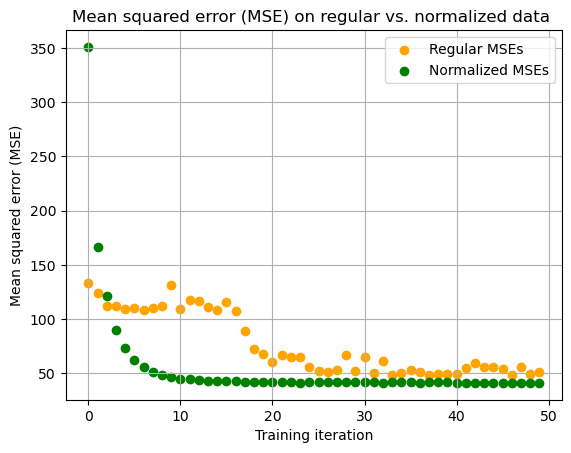

In [20]:
# Plott MSE for regular vs. normalized data

regular_MSEs = mses_50
normalized_MSEs = mses_50_norm
iterations = np.arange(50)

plt.title("Mean squared error (MSE) on regular vs. normalized data ")
plt.xlabel("Training iteration")
plt.ylabel("Mean squared error (MSE)")
plt.grid(True)

plt.scatter(iterations, regular_MSEs, color="orange",label="Regular MSEs")
plt.scatter(iterations, normalized_MSEs, color="green",label="Normalized MSEs",)
plt.legend()
plt.show()

#### Compare the mean of the mean squared errors between A and B

When comparing A and B we observe the following:
- the mean of the mean squared errors with normalized data in B is lower then in A with regular data
- the model with the normalized data in B has the lower MSEs than in A
- generally the mean squared errors decrease with more training iterations
- there is a limit of training iterations int both models where more iterations doe no longer contribute to the accuracy
- model A reaches the limit much earlier
- while the decrease function of MSE in B looks continuous and smooth, the decrease in A shows some outliers

> With normalized data we observe more accurate predictions.

As we know some machine learning algorithms benefit from normalization, e.g. KNN, Logistic Regression, K-Means and Neural Networks. That agrees with our above observations.

<a id="title_c"></a>
## C. Increase the number of epochs
Repeat Part B but use 100 epochs this time for training. How does the mean of the mean squared errors compare to that from Step B?

### Train and evaluation 50 times with 100 epochs each on normalized data

In [21]:
# build the model
model_100_norm = regression_model_shallow()

# Train and evaluate 50 times and calculate mean and standard deviation of the mean squared errors

# mean squared errors
mses_100_norm = np.array([])

for i in range(50):
    # train/test split
    X_train_100_norm, X_test_100_norm, y_train_100, y_test_100 = train_test_split(
        predictors_norm, target, test_size=0.3, random_state=42
    )

    # fit the model
    # verbose is set to 0 for clarity, increase if needed
    model_100_norm.fit(X_train_100_norm, y_train_100, epochs=100, verbose=0) # train with normalized training dataset and 50 epochs
    # evaluate the model
    mse_100_norm = mean_squared_error(y_test_100, model_100_norm.predict(X_test_100_norm))
    mses_100_norm = np.append(mses_100_norm, mse_100_norm, axis=None)
    print("Iteration " + str(i+1) + " of 50 training and evaluation of model complete. MSE is : {:.4f}".format(mse_100_norm))  

model_100_norm_mse_mean = np.mean(mses_100_norm, axis=0)
model_100_norm_mse_std = np.std(mses_100_norm, axis=0)
    
print("\n")
print("The mean deviation of the mean squared error (MSE) on normalized test set with 100 epochs: {:.4f}".format(model_100_norm_mse_mean))
print("The standard deviation of the mean squared error (MSE) on normalized test set with 100 epochs: {:.4f}".format(model_100_norm_mse_std))

Iteration 1 of 50 training and evaluation of model complete. MSE is : 158.0470
Iteration 2 of 50 training and evaluation of model complete. MSE is : 88.4743
Iteration 3 of 50 training and evaluation of model complete. MSE is : 59.9454
Iteration 4 of 50 training and evaluation of model complete. MSE is : 49.9950
Iteration 5 of 50 training and evaluation of model complete. MSE is : 46.1442
Iteration 6 of 50 training and evaluation of model complete. MSE is : 43.8765
Iteration 7 of 50 training and evaluation of model complete. MSE is : 43.0146
Iteration 8 of 50 training and evaluation of model complete. MSE is : 41.8221
Iteration 9 of 50 training and evaluation of model complete. MSE is : 41.2127
Iteration 10 of 50 training and evaluation of model complete. MSE is : 40.6610
Iteration 11 of 50 training and evaluation of model complete. MSE is : 40.5466
Iteration 12 of 50 training and evaluation of model complete. MSE is : 40.5748
Iteration 13 of 50 training and evaluation of model complete

#### Compare the decrease of mean squared errors between 50 and 100 epoch model

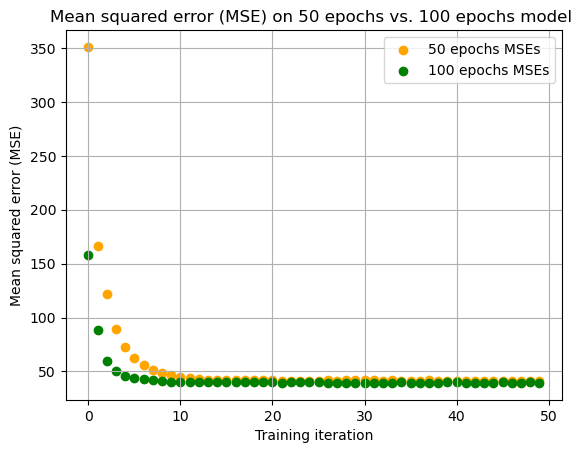

In [22]:
# Plott MSE for 50 vs. 100 epoch training

epoch_50_MSEs = mses_50_norm
epoch_100_MSEs = mses_100_norm
iterations = np.arange(50)

plt.title("Mean squared error (MSE) on 50 epochs vs. 100 epochs model ")
plt.xlabel("Training iteration")
plt.ylabel("Mean squared error (MSE)")
plt.grid(True)

plt.scatter(iterations, epoch_50_MSEs, color="orange", label="50 epochs MSEs")
plt.scatter(iterations, epoch_100_MSEs, color="green", label="100 epochs MSEs")
plt.legend()
plt.show()

#### Compare the mean of the mean squared errors between B and C

When comparing C and B we observe the following:
- the mean of the mean squared errors with 100 epochs in C is lower then in B with 50 epochs
- the model with 100 epochs in C has the lower MSEs than in B
- generally the mean squared errors decrease slightly with more epochs
- the model "learns" faster with more epochs, the MSEs decrease with less training iterations
- there is a limit at about 30 training iterations where more iterations doe no longer contribute to the accuracy
- both decrease functions of MSE in C and B look continuous and smooth

> With increased number of epochs we observe slightly more accurate predictions.


<a id="title_d"></a>
## D. Increase the number of hidden layers
Repeat part B but use a neural network with the following instead:
- Three hidden layers, each of 10 nodes and ReLU activation function.

How does the mean of the mean squared errors compare to that from Step B?

In [23]:
# define regression model with 3 hidden layers
def regression_model_deep():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,))) # 1st hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(10, activation='relu')) # 2nd hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(10, activation='relu')) # 3rd hidden layer of 10 nodes, and a ReLU activation function
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error') # adam optimizer and the mean squared error  as the loss function
    return model

In [27]:
# build the model
model_deep_50_norm = regression_model_deep()

# Train and evaluate 50 times and calculate mean and standard deviation of the mean squared errors

# mean squared errors
mses_deep_50_norm = np.array([])

for i in range(50):
    # train/test split
    X_train_deep_50_norm, X_test_deep_50_norm, y_train_deep_50, y_test_deep_50 = train_test_split(
        predictors_norm, target, test_size=0.3, random_state=42
    )

    # fit the model
    # verbose is set to 0 for clarity, increase if needed
    model_deep_50_norm.fit(X_train_deep_50_norm, y_train_deep_50, epochs=50, verbose=0) # train with normalized training dataset and 50 epochs
    # evaluate the model
    mse_deep_50_norm = mean_squared_error(y_test_deep_50, model_deep_50_norm.predict(X_test_deep_50_norm))
    mses_deep_50_norm = np.append(mses_deep_50_norm, mse_deep_50_norm, axis=None)
    print("Iteration " + str(i+1) + " of 50 training and evaluation of model complete. MSE is : {:.4f}".format(mse_deep_50_norm))  

model_deep_50_norm_mse_mean = np.mean(mses_deep_50_norm, axis=0)
model_deep_50_norm_mse_std = np.std(mses_deep_50_norm, axis=0)
    
print("\n")
print("The mean deviation of the mean squared error (MSE) on normalized test set: {:.4f}".format(model_deep_50_norm_mse_mean))
print("The standard deviation of the mean squared error (MSE) on normalized test set: {:.4f}".format(model_deep_50_norm_mse_std))

Iteration 1 of 50 training and evaluation of model complete. MSE is : 115.1278
Iteration 2 of 50 training and evaluation of model complete. MSE is : 83.9493
Iteration 3 of 50 training and evaluation of model complete. MSE is : 65.6761
Iteration 4 of 50 training and evaluation of model complete. MSE is : 48.0231
Iteration 5 of 50 training and evaluation of model complete. MSE is : 45.8093
Iteration 6 of 50 training and evaluation of model complete. MSE is : 42.1106
Iteration 7 of 50 training and evaluation of model complete. MSE is : 41.3864
Iteration 8 of 50 training and evaluation of model complete. MSE is : 41.8472
Iteration 9 of 50 training and evaluation of model complete. MSE is : 40.0176
Iteration 10 of 50 training and evaluation of model complete. MSE is : 41.2585
Iteration 11 of 50 training and evaluation of model complete. MSE is : 40.1035
Iteration 12 of 50 training and evaluation of model complete. MSE is : 40.9672
Iteration 13 of 50 training and evaluation of model complete

In [25]:
#### Compare the decrease of mean squared errors between shallow and deep model

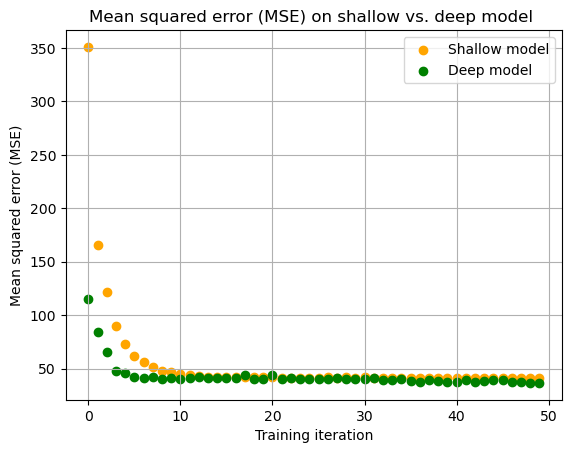

In [28]:
# Plott MSE for shallow vs. deep model

epoch_50_MSEs = mses_50_norm
epoch_100_MSEs = mses_deep_50_norm
iterations = np.arange(50)

plt.title("Mean squared error (MSE) on shallow vs. deep model ")
plt.xlabel("Training iteration")
plt.ylabel("Mean squared error (MSE)")
plt.grid(True)

plt.scatter(iterations, epoch_50_MSEs, color="orange", label="Shallow model")
plt.scatter(iterations, epoch_100_MSEs, color="green", label="Deep model")
plt.legend()
plt.show()

#### Compare the mean of the mean squared errors between B and D

When comparing D and B we observe the following:
- the mean of the mean squared errors with a deeper network of 3 hidden layers in D is lower then in B with 1 hidden layer
- the deep model D has the lower MSEs than in B
- generally the mean squared errors decrease with the model depth (more hidden layers)
- both decrease functions of MSE in D and B look continuous and smooth

> With increased number of hidden layers we observe more accurate predictions.
